<a href="https://colab.research.google.com/github/BashirAljounaidy/ML-tasks/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import random
csv_url = '/content/customer .csv'

In [173]:
df=pd.read_csv(csv_url,header=0)
display(df.shape)


(7043, 21)

Our data  is (7043, 21), meaning the dataset has 7043 rows and 22 columns.

In [119]:
display(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

here we have columns names it will be very usefull for us to explore them .

In [120]:
df.nunique(axis=0)

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

we can see here the number of unique values in each columns. notice that some columns have 2 , 3 , 4 unique values  so it is maybe a categorical values and others like MonthlyCharges, TotalCharges  and tenure maybe a qualitative value So let see another good information about our data  

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7000 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6896 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


here we can extract very useful information first : we should considered there are  missing values in some columns like : SeniorCitizen and tenure . also we can see that SeniorCitizen , tenure , MonthlyCharges ,TotalCharges are all a numerical columns . now let see some of actual data like first 5 rows

In [122]:
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


we have some missing data so let try by the latest 5 rows

In [123]:
display(df.tail())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0.0,No,No,66.0,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


###Dealing with missing data

In [175]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7000.000000,6896.000000,7043.000000,7043.000000
mean,0.163143,33.041473,64.761692,2283.300440
std,0.369522,24.382260,30.090047,2265.000258
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,10.000000,35.500000,402.225000
50%,0.000000,30.000000,70.350000,1400.550000
75%,0.000000,56.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


we can see here tenure mean about 33 and median about 30 , now let us fill missing values with a random number between this 

In [178]:
# make a copy 
df1= df.copy(deep=True)

# random.uniform() is  a function fill random number between 30 and 33 
df1['tenure']= df1['tenure'].fillna(random.uniform(30, 33))

# let us see overveiw of our data after fill 
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7000.000000,7043.000000,7043.000000,7043.000000
mean,0.163143,33.005887,64.761692,2283.300440
std,0.369522,24.127662,30.090047,2265.000258
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,10.000000,35.500000,402.225000
50%,0.000000,31.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## we may ask does fill impact median and mean ? 
let see

original mean : 33.04147331786543 and median :30.0


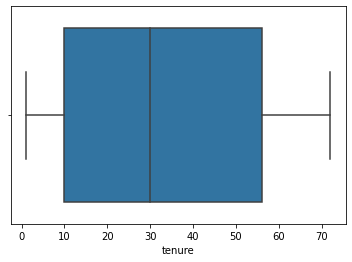

In [154]:
#box plot of the original data
print(f"original mean : {df['tenure'].mean()} and median :{df['tenure'].median()}")
ax = sns.boxplot(x=df['tenure'])

original mean : 32.99789277315102 and median :30.953461233350627


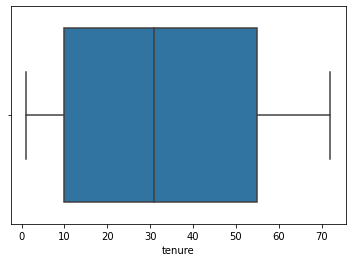

In [155]:
#box plot of the data after fill nan values
print(f"original mean : {df1['tenure'].mean()} and median :{df1['tenure'].median()}")
ax = sns.boxplot(x=df1['tenure'])

We need to fix SeniorCitizen column 

0.0    0.836857
1.0    0.163143
Name: SeniorCitizen, dtype: float64

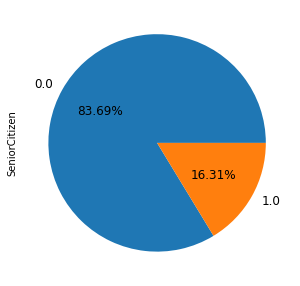

In [179]:
# function to draw a pie chart 
def cat_ratio(df,column):
  ratio = df[column].value_counts()/ df[column].count()
  ratio.plot.pie(autopct='%.2f%%', labels = ['0.0', '1.0'],figsize =(5,5), fontsize = 12 )
  return ratio

cat_ratio(df1,'SeniorCitizen') 

lets deal with missing values in SeniorCitizen column , we have here the value '0.0' > 83.69% and '1.0' > 16.31% we need to fill missing values with the same ratio of 1s and 0s 

0.0    0.837285
1.0    0.162715
Name: SeniorCitizen, dtype: float64

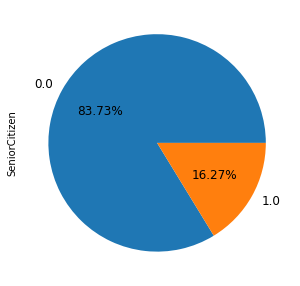

In [180]:
# generate a list of one's  and zeros with same ratio
choices = [0, 1]
SeniorCitizen_fillvalues = list(np.random.choice(choices, 43, p=[0.8369, 0.1631]))

# take a copy of dataframe
df2= df1.copy(deep=True) 

#fill missing values with one values of our list
df2['SeniorCitizen']= df1['SeniorCitizen'].apply(lambda x: SeniorCitizen_fillvalues.pop() if pd.isna(x) else x)

# draw a ratio after fill missing values
pie_chart(df2,'SeniorCitizen') 

In [182]:

print(f"original mean : {df1['SeniorCitizen'].mean()} and median :{df1['tenure'].median()}")
print(f"after-fix mean : {df2['SeniorCitizen'].mean()} and median :{df2['tenure'].median()}")

original mean : 0.16314285714285715 and median :31.0
after-fix mean : 0.16271475223626294 and median :31.0


after check we can see that SeniorCitizen mean and median not affected 

## we need to see Categorical data 

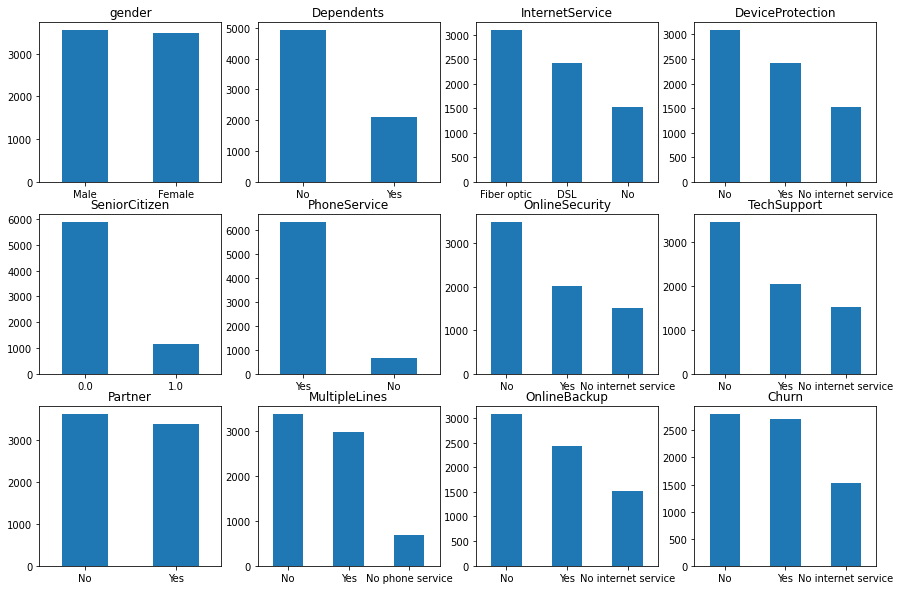

In [105]:
#extract categorical_data not include qulitative data
categorical_data= [column for column in df.columns if len(df[column].unique()) < 10 ]

# draw to see options and ratios 
fig, axes = plt.subplots(nrows = 3,ncols = 4,figsize = (15,10))
for i, item in enumerate(categorical_data):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i >=6 and i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    elif i < 12:
      ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-9,3],rot = 0)
    ax.set_title(item)

## Analyzing relationships between variables

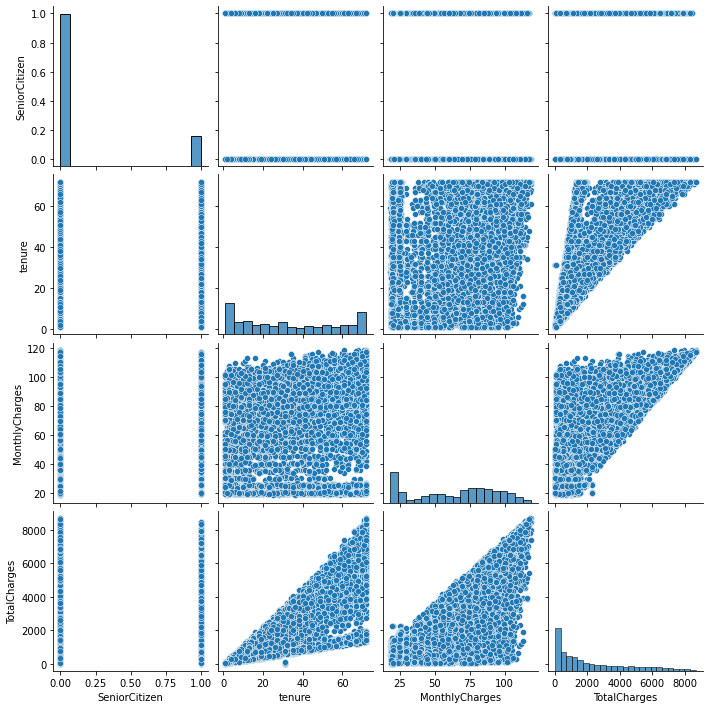

In [190]:
sns.pairplot(df2)

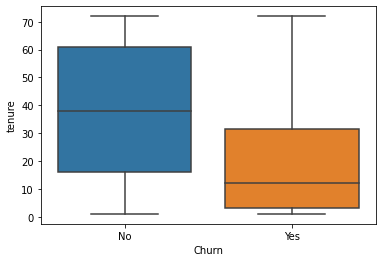

In [183]:
sns.boxplot(x = df2.Churn, y = df2.tenure)

In [186]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [196]:
sns.boxplot(x = df2.Churn, y = df2.PaperlessBilling)

TypeError: ignored

In [200]:
df[['gender','Churn']].corr()

""
